In [22]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

### 读取数据

In [9]:
f = open('D:/python/看课吧推荐系统/data and code/l2/l2data/team_cluster_data.csv')
team=pd.read_csv(f)

In [10]:
team

,国家,2019国际排名,2018世界杯排名,2015亚洲杯排名
0,中国,73,40,7
1,日本,60,15,5
2,韩国,61,19,2
3,伊朗,34,18,6
4,沙特,67,26,10
5,伊拉克,91,40,4
6,卡塔尔,101,40,13
7,阿联酋,81,40,6
8,乌兹别克斯坦,88,40,8
9,泰国,122,40,17


### 数据可视化

使用matplotlib绘制分布散点图 

In [32]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

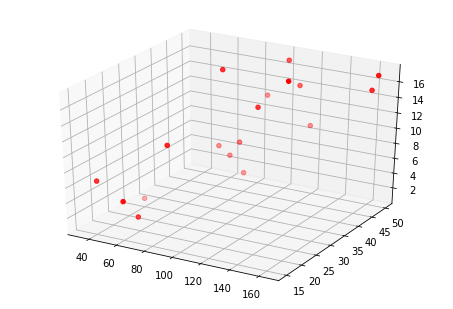

In [35]:
fig = plt.figure()
ax = Axes3D(fig) 
ax.scatter(team['2019国际排名'], team['2018世界杯排名'], team['2015亚洲杯排名'], c='r')

### 使用kmeans聚类算法进行分类

In [11]:
train=team[['2019国际排名','2018世界杯排名','2015亚洲杯排名']]

In [19]:
min_max_scaler=MinMaxScaler()
train_x=min_max_scaler.fit_transform(train)

In [24]:
kmeans=KMeans(n_clusters=3)#分为三类

In [25]:
kmeans.fit(train_x)
predict=kmeans.predict(train_x)

In [30]:
res=pd.concat((team,pd.DataFrame(predict)),axis=1)
res

,国家,2019国际排名,2018世界杯排名,2015亚洲杯排名,0
0,中国,73,40,7,2
1,日本,60,15,5,0
2,韩国,61,19,2,0
3,伊朗,34,18,6,0
4,沙特,67,26,10,0
5,伊拉克,91,40,4,2
6,卡塔尔,101,40,13,1
7,阿联酋,81,40,6,2
8,乌兹别克斯坦,88,40,8,2
9,泰国,122,40,17,1


In [40]:
res[res[0]==0]

,国家,2019国际排名,2018世界杯排名,2015亚洲杯排名,0
1,日本,60,15,5,0
2,韩国,61,19,2,0
3,伊朗,34,18,6,0
4,沙特,67,26,10,0
14,澳洲,40,30,1,0


### 完成分类 再次进行可视化

FINISHED!


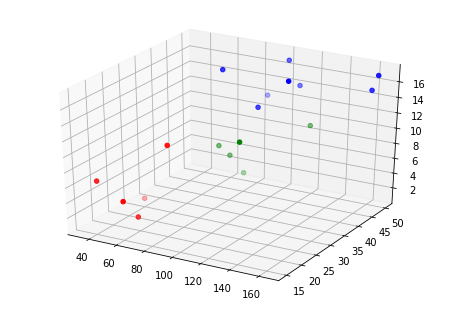

In [42]:
fig = plt.figure()
ax = Axes3D(fig) 
ax.scatter(res[res[0]==0]['2019国际排名'], res[res[0]==0]['2018世界杯排名'], res[res[0]==0]['2015亚洲杯排名'], c='r')
ax.scatter(res[res[0]==1]['2019国际排名'], res[res[0]==1]['2018世界杯排名'], res[res[0]==1]['2015亚洲杯排名'], c='b')
ax.scatter(res[res[0]==2]['2019国际排名'], res[res[0]==2]['2018世界杯排名'], res[res[0]==2]['2015亚洲杯排名'], c='g')

print('FINISHED!')